# BITCOIN

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 16.4 MB/s eta 0:00:00


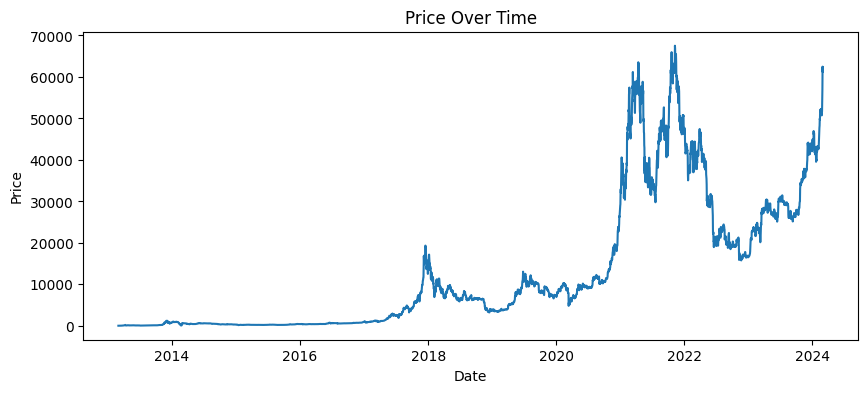

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima
import numpy as np

data = pd.read_csv('Bitcoin Historical Data.csv', parse_dates = ['Date'], index_col=['Date'])
plt.figure(figsize=(10, 4))
plt.plot(data['Price'])
plt.title('Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=51115.404, Time=12.80 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=51148.584, Time=0.14 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=51134.337, Time=1.02 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=51133.775, Time=0.83 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=51148.014, Time=0.07 sec
 ARIMA(2,1,2)(0,0,1)[4] intercept   : AIC=51130.906, Time=4.87 sec
 ARIMA(2,1,2)(1,0,0)[4] intercept   : AIC=inf, Time=11.52 sec
 ARIMA(2,1,2)(2,0,1)[4] intercept   : AIC=inf, Time=17.25 sec
 ARIMA(2,1,2)(1,0,2)[4] intercept   : AIC=51117.515, Time=18.73 sec
 ARIMA(2,1,2)(0,0,0)[4] intercept   : AIC=51116.043, Time=6.75 sec
 ARIMA(2,1,2)(0,0,2)[4] intercept   : AIC=51115.716, Time=15.51 sec
 ARIMA(2,1,2)(2,0,0)[4] intercept   : AIC=51131.185, Time=9.74 sec
 ARIMA(2,1,2)(2,0,2)[4] intercept   : AIC=inf, Time=20.45 sec
 ARIMA(1,1,2)(1,0,1)[4] intercept   : AIC=51139.371, Time=5.95 sec
 ARIMA(2,1,1)(1,0,1)[4] interce

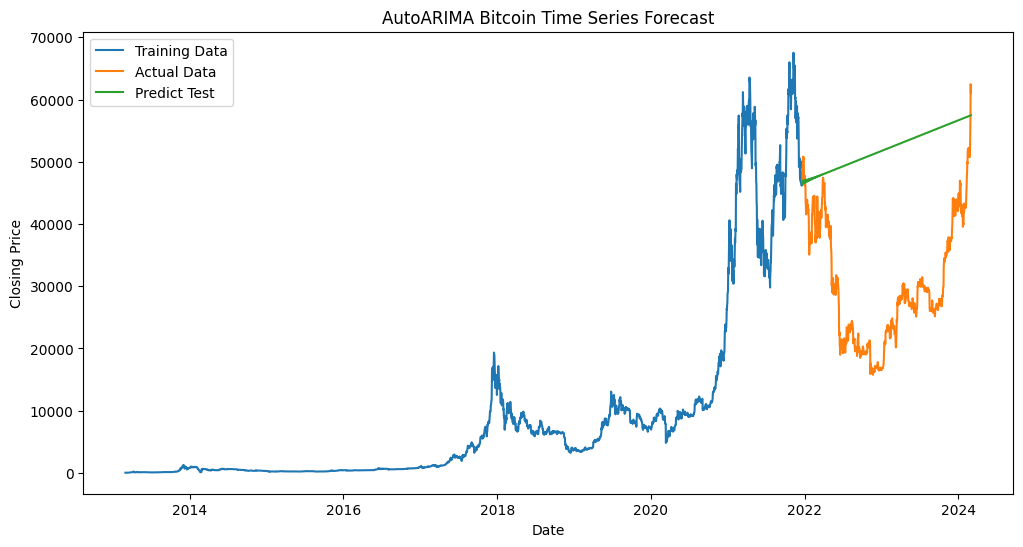

In [ ]:
time_series = data['Price']

train_size = int(0.8 * len(time_series))
test_size = int(0.2 * len(time_series))

train_data = time_series[:train_size]

test_data = time_series[train_size:train_size+test_size]

model = auto_arima(train_data,
                   m=4, seasonal=True,
                     trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True)

model.fit(train_data)

pred_test = model.predict(n_periods=len(test_data))


# last_index = time_series.index[-1]
# last_index

# next_30_days = pd.date_range(start=time_series.index[train_size-1] + pd.DateOffset(days=1), periods=30, freq='D')

# future_index = pd.DataFrame(index=next_30_days)

date_next_30_days = np.array(range(1, 31)).reshape(-1, 1)
# price_next_30_days = model.predict(n_periods=len(date_next_30_days))

plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Actual Data')
plt.plot(test_data.index, pred_test, label='Predict Test')
# plt.plot(future_index.index, price_next_30_days, label='Next 30 days')
plt.title('AutoARIMA Bitcoin Time Series Forecast')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

NASDAQ

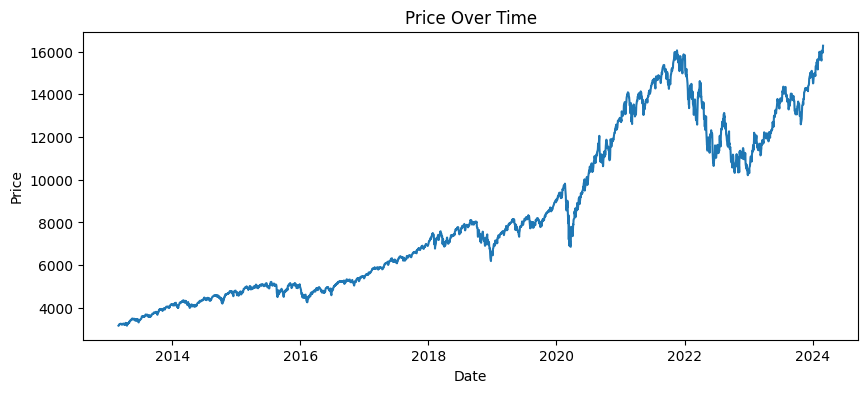

In [ ]:
data = pd.read_csv('NASDAQ Composite Historical Data.csv', parse_dates = ['Date'], index_col=['Date'])
plt.figure(figsize=(10, 4))
plt.plot(data['Price'])
plt.title('Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=26587.442, Time=5.50 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=26642.378, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=26591.888, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=26598.536, Time=0.78 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=26647.457, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=26586.333, Time=1.56 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=26584.689, Time=0.64 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=26586.172, Time=0.79 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=26588.001, Time=1.13 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=26586.122, Time=3.90 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=26590.700, Time=0.15 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0] intercept
Total fit time: 14.733 seconds


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


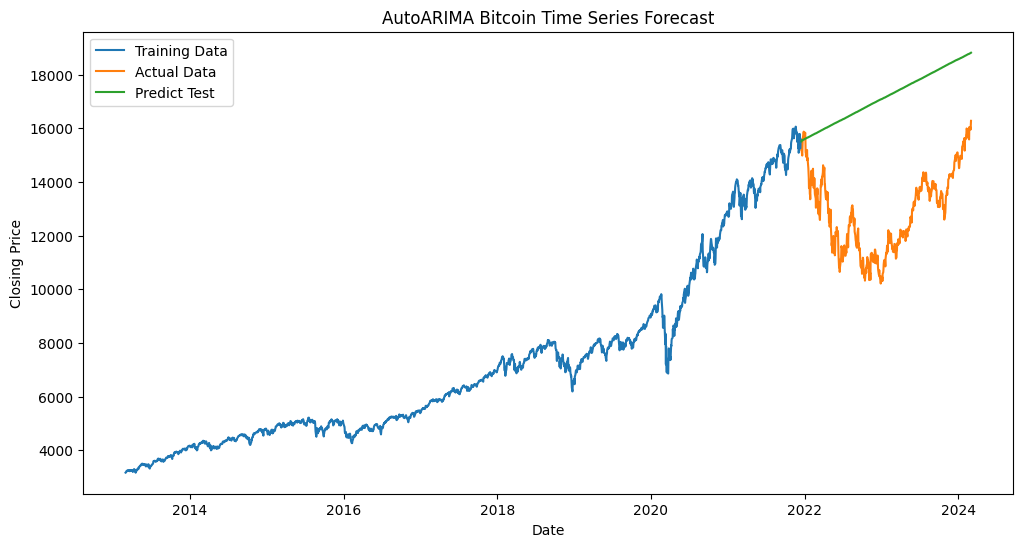

In [ ]:
time_series = data['Price']

train_size = int(0.8 * len(time_series))
test_size = int(0.2 * len(time_series))

train_data = time_series[:train_size]
test_data = time_series[train_size:train_size+test_size]

model = auto_arima(train_data,
                     trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True)

model.fit(train_data)

pred_test = model.predict(n_periods=len(test_data))


# last_index = time_series.index[-1]
# last_index

# next_30_days = pd.date_range(start=time_series.index[train_size-1] + pd.DateOffset(days=1), periods=30, freq='D')

# future_index = pd.DataFrame(index=next_30_days)

date_next_30_days = np.array(range(1, 31)).reshape(-1, 1)
# price_next_30_days = model.predict(n_periods=len(date_next_30_days))

plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Actual Data')
plt.plot(test_data.index, pred_test, label='Predict Test')
# plt.plot(future_index.index, price_next_30_days, label='Next 30 days')
plt.title('AutoARIMA Bitcoin Time Series Forecast')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

USD

In [ ]:
data = pd.read_csv('US Dollar Index Futures Historical Data.csv', parse_dates = ['Date'], index_col=['Date'])
data

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2013-03-01,82.36,82.010,82.580,81.850,34.83K,0.43%
2013-03-04,82.26,82.355,82.530,82.230,19.76K,-0.13%
2013-03-05,82.15,82.210,82.300,81.955,25.02K,-0.13%
2013-03-06,82.51,82.020,82.640,81.975,26.04K,0.44%
2013-03-07,82.12,82.615,82.620,81.995,35.17K,-0.47%
...,...,...,...,...,...,...
2024-02-26,103.75,103.890,103.950,103.630,9.87K,-0.10%
2024-02-27,103.76,103.715,103.860,103.540,9.01K,0.01%
2024-02-28,103.90,103.750,104.170,103.750,12.25K,0.14%


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2194.366, Time=5.74 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2200.652, Time=0.26 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2202.619, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2202.622, Time=0.51 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2199.224, Time=0.16 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2200.427, Time=2.45 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2200.761, Time=1.70 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=2197.139, Time=5.31 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=2197.587, Time=5.87 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2203.311, Time=1.58 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2196.084, Time=6.40 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=2195.769, Time=4.23 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=2198.130, Time=7.59 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=2192.926, Time=2.69 sec
 ARIMA(1,1,2)(0,0,0)[0]          

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


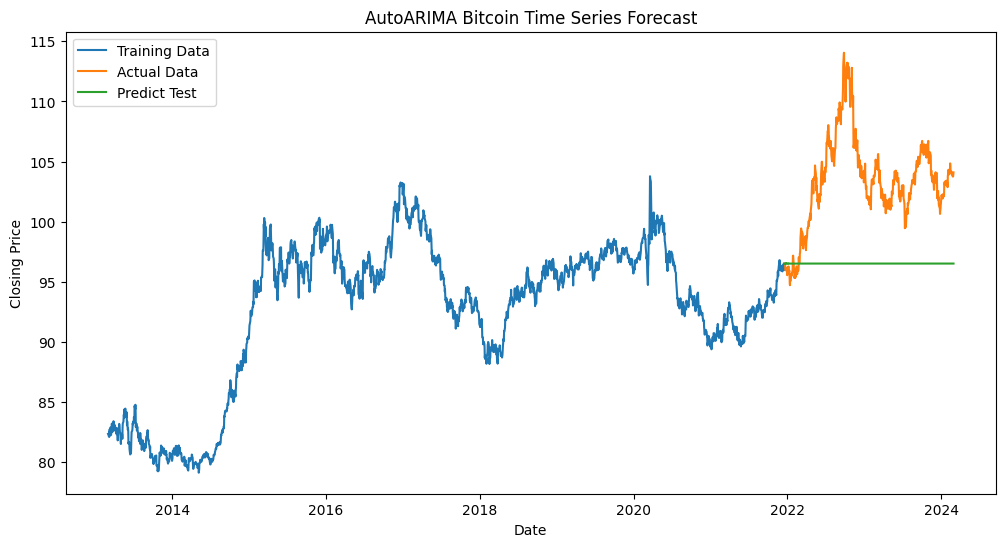

In [ ]:
time_series = data['Price']

train_size = int(0.8 * len(time_series))
test_size = int(0.2 * len(time_series))

train_data = time_series[:train_size]
test_data = time_series[train_size:train_size+test_size]

model = auto_arima(train_data,
                     trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True)

model.fit(train_data)

pred_test = model.predict(n_periods=len(test_data))


# last_index = time_series.index[-1]
# last_index

# next_30_days = pd.date_range(start=time_series.index[train_size-1] + pd.DateOffset(days=1), periods=30, freq='D')

# future_index = pd.DataFrame(index=next_30_days)

date_next_30_days = np.array(range(1, 31)).reshape(-1, 1)
# price_next_30_days = model.predict(n_periods=len(date_next_30_days))

plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Actual Data')
plt.plot(test_data.index, pred_test, label='Predict Test')
# plt.plot(future_index.index, price_next_30_days, label='Next 30 days')
plt.title('AutoARIMA Bitcoin Time Series Forecast')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()